# Data Wrangling

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## Project Details

Data wrangling, which consists of:
<ul>
    <li>Gathering data</li>
    <li>Assessing data</li>
    <li>Cleaning data</li>
    <li>Storing, analyzing, and visualizing your wrangled data</li>
</ul>

## Data Gathering

In  this project we are using three dataset
<ol>
    <li> The WeRateDogs Twitter data file which holds 2356 entries with 17 columns.I manually download this file from the link <a>twitter_archive_enhanced.csv</a></li>
    <li> The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: <a>image_predictions.tsv</a></li>
    <li>Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.</li>

## Importing Libraries

In [2]:
import pandas as pd
import requests
import os
import tweepy
import time
import json
import re
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings


## Gathering the Data

### Twitter Archive Enhanced Data

In [128]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

### Visualizing the Dataframe Programatically

In [129]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [132]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Twitter Image Predictions Data

In [8]:
folder_name = "tweet_image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]),mode="wb") as file:
    file.write(response.content)

In [9]:
df2 = pd.read_csv("tweet_image_predictions/image-predictions-Copy1.tsv",sep="\t")

In [10]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Query the Twitter API

In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [16]:
df_tweet_ids  = df1["tweet_id"]

In [17]:
df_list = []
error_list = []

start = time.time()

for tweet_id in df1['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # to see how many favorite the tweets had
        retweets = tweet['retweet_count'] # for counting the retweets
        user_followers = tweet['user']['followers_count'] # to see how many followers the user had
        user_favourites = tweet['user']['favourites_count'] # to see how many favorites the user had
        #tweet_created_time = tweet['created_at'] # to see the datetime of tweet
        #user_created_time = tweet["user"]["created_at"]
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites)
                        })
        #'user_created_time': pd.to_datetime(user_created_time),
        #'tweet_created_time': pd.to_datetime(tweet_created_time
        
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()

print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [18]:
print("The length the total tweet records:",len(error_list))
print("The length the total tweet records:",len(df_list))

The length the total tweet records: 25
The length the total tweet records: 2331


In [19]:
tweet_json_file = 'tweet_json.txt'

In [20]:
# save the JSON data in the list to the output file
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in df_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [21]:
### Storing the data into Dataframe
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['tweet_id']
        data_retweet_count = data['retweets']
        data_favorite_count = data['favorites']
        data_user_followers = data['user_followers']
        data_user_favourites = data['user_favourites']
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweets': data_retweet_count, 
                     'favorites': data_favorite_count,
                     'user_followers': data_user_followers,
                     'user_favourites':data_user_favourites
                     
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()

In [28]:
df3_final = pd.DataFrame(tweet_json_data, columns = ['tweet_id', 'retweets', 'favorites',
                                               'user_followers', 'user_favourites'])


In [ ]:
### Exporting the data as CSV file

In [29]:
df3_final.shape

(2331, 5)

In [30]:
df3_final.head()

,tweet_id,retweets,favorites,user_followers,user_favourites
0,892420643555336193,7548,35714,8855163,145874
1,892177421306343426,5594,30870,8855163,145874
2,891815181378084864,3703,23211,8855163,145874
3,891689557279858688,7729,39009,8855163,145874
4,891327558926688256,8332,37262,8855163,145874


In [31]:
df3_final.tail()

,tweet_id,retweets,favorites,user_followers,user_favourites
2326,666049248165822465,40,96,8854948,145874
2327,666044226329800704,127,265,8854948,145874
2328,666033412701032449,40,111,8854948,145874
2329,666029285002620928,42,120,8854948,145874
2330,666020888022790149,457,2381,8854948,145874


In [32]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
retweets           2331 non-null int64
favorites          2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
dtypes: int64(5)
memory usage: 91.1 KB


After the end of Data Gathering process we have now three different dataframes namely
<ol>
    <li>df1 - Dataframe which holds the twitter data with ratings of the dogs</li>
    <li>df2 - Dataframe with the image of the dogs and by using that image there is predictions happened with the help of neural network concepts and its corresponding confidence interval value </li>
    <li> df3_clean - Dataframe with favorites, no of follwers and likes for each individual tweets </li>
</ol>

### Assessing Data

Assessing the data can be done with two possible methods. 
<ol>
    <li>Visually</li> 
    <li>Programatically</li>

### 1. Twitter Archived Enhanced Data

In [33]:

df1.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
1836,676098748976615425,NaN,NaN,2015-12-13 17:57:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676098748...,3,10,None,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None


In [34]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [36]:
sum(df1.duplicated())

0

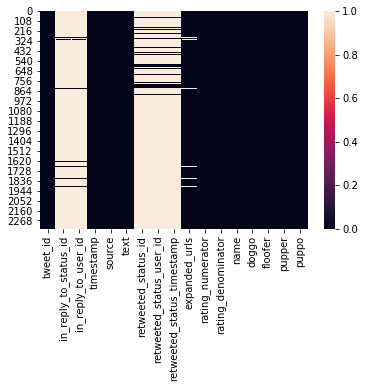

In [37]:
sns.heatmap(df1.isnull())

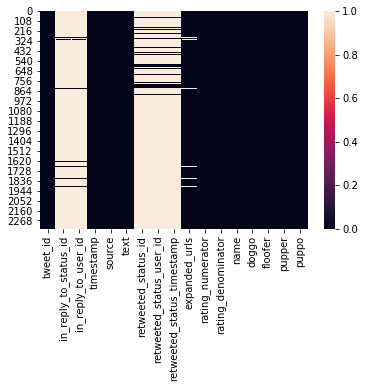

In [38]:
sns.heatmap(df1.isna())

In [134]:
df1.retweeted_status_id.notnull().sum()

181

### Twitter Image Predictions Data

In [39]:
df2.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
310,671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True
1797,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
1434,773670353721753600,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,1,Old_English_sheepdog,0.969311,True,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
sum(df2.duplicated())

0

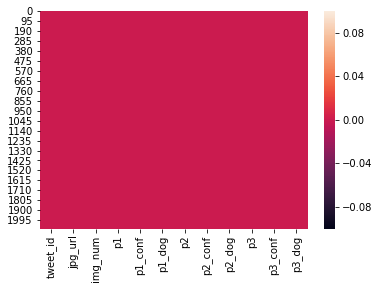

In [42]:
sns.heatmap(df2.isna())

### Twitter api data

In [43]:
df3_final.sample(15)

,tweet_id,retweets,favorites,user_followers,user_favourites
273,838916489579200512,34,0,8855165,145874
149,861383897657036800,9934,34149,8855164,145874
2138,669375718304980992,678,1254,8854948,145874
1309,705442520700944385,1589,4347,8855186,145874
1006,745433870967832576,2489,6977,8855185,145874
2027,671486386088865792,183,549,8854947,145874
235,846042936437604353,2778,15654,8855165,145874
717,781163403222056960,2748,9827,8855171,145874
85,875747767867523072,3845,23352,8855163,145874
2102,670319130621435904,1143,3694,8854948,145874


In [44]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
retweets           2331 non-null int64
favorites          2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
dtypes: int64(5)
memory usage: 91.1 KB


In [45]:
sum(df3_final.duplicated())

0

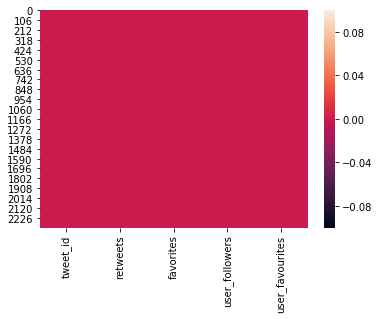

In [46]:
sns.heatmap(df3_final.isnull())

### Assessment Of Quality

#### df1 dataframe

<ol>
    <li>
        <ul>
            <li>Change the tweet_id to string object now its an integer</li>
            <li>Change the columns like in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id to String object not it is in float datatype.</li>
            <li>Change Timestamp,retweeted_status_timestamp to String.</li>
        </ul>
    <li> Providing appropritate names for the columns like text to "tweet_text", timestamp to "tweet_timestamp", name to "dog_name", rating_numerator to "dog_score_outof10" </li>
    <li> Invalid values in both numerator and denominators</li>
    <li>Provide the data with appropriate readable format for the column Source</li>
    <li> Extrcating the day, month, year, dayoftheweek from the column timestamp which is used for time based analysis </li>
    <li> Finding the gender of the dog by using the tweet_text by splitting the text with appropriate function</li>
    <li>Removing unneeded columns</li>
    </ol>


#### df2 dataframe

<ol>
    <li> Appending the predicted dog name with its corresponding confidence interval value </li>
</ol>

#### df3_final dataframe

<ol>
    <li>user_favourites value is same for all rows, which seems incorrect </li>
    <li>datetime should be of datatime datatype instead of string</li>
</ol>

### Assessment On Tidiness

<ol>
    <li> Combine and clean different dog stages (eg: pupper,doggo) columns into one using the function melt </li>
    <li> Merge all the three dataset into a single dataset </li>
<ol>

<table>
  <tr>
    <th>Issue No</th>
    <th>Description</th>
    <th>Category</th>
      <th> Dataframe</th>
  </tr>
  <tr>
    <td>Issue 1</td>
    <td>Change the datatype</td>
    <td>Quality</td>
      <td> df1</td>
  <tr>
    <td>Issue 2</td>
    <td>Rename the column with appropriate names</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
  <tr>
    <td>Issue 3</td>
    <td>Remove the invalid data in both numerator & denominator of the ranking and making corrections in rating if it has any wrong data</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
  <tr>
    <td>Issue 4</td>
    <td>Alter the data into more readable form for the column source</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
  <tr>
    <td>Issue 5</td>
    <td>Extract day, month and year from timestamp column to do indepth analysis about time related findings</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
  <tr>
    <td>Issue 6</td>
    <td>Find the dog gender using tweet_text column</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
    <tr>
    <td>Issue 7</td>
    <td>Delete the column which has null and na</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
    <tr>
    <td>Issue 8</td>
    <td>Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.</td>
    <td>Tidiness</td>
    <td> df1</td>
  </tr>
    <tr>
    <td>Issue 9</td>
    <td>Append dog predicted name with corresponding C.I value</td>
    <td>Quality</td>
    <td> df2</td>
  </tr>
    <tr>
    <td>Issue 10</td>
    <td>Change the datatype</td>
    <td>Quality</td>
    <td> df3_final</td>
  </tr>
    <tr>
    <td>Issue 11</td>
    <td>Remove unwanted columns in all dataframes</td>
    <td>Quality</td>
    <td> df1, df2, df3_final</td>
  </tr>
    <tr>
    <td>Issue 12</td>
    <td>Merge the dataframe</td>
    <td>Tidiness</td>
    <td> df1,df2, df3_final</td>
  </tr>
    <tr>
    <td>Issue 13</td>
    <td>Remove the Retweet records</td>
    <td>Quality</td>
    <td> df1</td>
  </tr>
    <tr>
    <td>Issue 14</td>
    <td>Reorder the structure of the final dataframe</td>
    <td>Tidiness</td>
    <td>tweet_final_clean</td>
  </tr>
</table>

</body>
</html>


### Cleaning

In [220]:
# taking the copy of each original dataset
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_final_clean = df3_final.copy()

#### Define

Issue 1 : Change the datatype

#### Code

In [221]:
df1_clean.tweet_id = df1.tweet_id.astype(str)
df1_clean.in_reply_to_status_id = df1.in_reply_to_status_id.astype(str)
df1_clean.in_reply_to_user_id = df1.in_reply_to_user_id.astype(str)
df1_clean.retweeted_status_id = df1.retweeted_status_id.astype(str)
df1_clean.retweeted_status_user_id = df1.retweeted_status_user_id.astype(str)

df1_clean.timestamp = pd.to_datetime(df1.timestamp)
df1_clean.retweeted_status_timestamp     = pd.to_datetime(df1.retweeted_status_timestamp)

#### Test

In [222]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

#### Define

Issue 2:  Rename the column with appropriate names	

#### Code

In [223]:
df1_clean.rename(columns={"text":"tweet_text","timestamp":"tweet_timestamp","rating_numerator":"dog_score_outof10","name":"dog_name"},inplace=True)

#### Test

In [224]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
tweet_timestamp               2356 non-null datetime64[ns]
source                        2356 non-null object
tweet_text                    2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
dog_score_outof10             2356 non-null int64
rating_denominator            2356 non-null int64
dog_name                      2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

#### Define

Issue 3: Remove the invalid data in both numerator & denominator of the ranking and making corrections in rating if it has any wrong data	

#### Code

In [225]:
# Invalid values in denominator
df1_clean[df1_clean["rating_denominator"]!=10].shape 

(23, 17)

There are 23 cases with a wrong value in denominator. So, these records needs to be removed from the dataset.

In [226]:
# Deleting those 23 records from the dataset 
df1_clean = df1_clean[df1_clean["rating_denominator"]==10]

In [227]:
df1_clean.shape

(2333, 17)

Since all the denominator whose value not equal to 10 has removed.Now all records in the dataset has the denominator value 10 so need for the column rating_denominator.It has to be dropped from the dataset.

In [228]:
df1_clean.drop(columns=["rating_denominator"],inplace = True) # Droping the column

In [229]:
# Checking the uniques values of dog score and its occurances
df1_clean.dog_score_outof10.value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: dog_score_outof10, dtype: int64

Removing the cases where the dog_score is less than or equal to 10.As per the noms these values should be greater than 10.

In [230]:
# there are 895 records which falls under this scenario
df1_clean[df1_clean.dog_score_outof10 <= 10].shape


(895, 16)

There are 895 cases with a wrong value in numerator. So, these records needs to be removed from the dataset.

In [231]:
# deleting the cases with the score less than or equal to 10
df1_clean.drop(df1_clean[df1_clean["dog_score_outof10"]<=10].index,inplace=True)

In [232]:
# checking wheather the records has been deleted or not?
df1_clean.dog_score_outof10.value_counts().sort_values(ascending=False)

12      558
11      463
13      351
14       54
15        2
75        2
420       2
17        1
26        1
27        1
182       1
666       1
1776      1
Name: dog_score_outof10, dtype: int64

##### Now it is necessary to access the records with the rating score of 15,75,420,17,26,27,182,666,1776 since its looks odd from other tweet scores.

In [233]:
rating = [15,75,420,17,26,27,182,666,1776]

for i in rating:
    print('Rating Number: %s'%(i))
    for j in range(0,len(df1.index)):
        if df1.rating_numerator[j] == i:
            print("Tweet id: %s"%(df1.tweet_id[j]))
            print("Tweet text: %s"%(df1.text[j]))
            print("expanded_urls: %s"%(df1.expanded_urls[j]))
            print("indexx number: %s"%(df1.index[j]))
            print()
            print("-------------------------------")
            print()
        else:
            pass 

Rating Number: 15
Tweet id: 838916489579200512
Tweet text: RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
expanded_urls: https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1
indexx number: 285

-------------------------------

Tweet id: 838085839343206401
Tweet text: @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
expanded_urls: nan
indexx number: 291

-------------------------------

Rating Number: 75
Tweet id: 832215909146226688
Tweet text: RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
expanded_urls: https://twitter.com/dog_rates/status/786709082849828864/photo/1
indexx number: 340

-------------------------------

Tweet id: 7867090828

#### Observations about the issues
1. case with the rating number 15 : It is evident that the rating value is 15 out of 10 from the tweet text.So no need of any change or deletion .

2. case with the rating number 75 : From the tweet text it is conclude that the rating value has some wrong entry i,e) instead of 9.75 the record holds the value 75.So, the rating value 9.75 is less than 10 so the index with the value 340,695 has to gets dropped from the dataset.

3. case with the rating number 420 : It is evident that the rating value is 420 out of 10 from the tweet text.So no need of any change or deletion .

4. case with the rating number 17 : It is evident that the rating value is 17 out of 10 from the tweet text.So no need of any change or deletion .

5. case with the rating number 26 :  From the tweet text it is conclude that the rating value has some wrong entry i,e) instead of 11.26 the record holds the value 26.It has to be changed.

6. case with the rating number 27 :  From the tweet text it is conclude that the rating value has some wrong entry i,e) instead of 11.27 the record holds the value 26.It has to be changed.

7. case with the rating number 182 : It is evident that the rating value is 182 out of 10 from the tweet text.So no need of any change or deletion .

8. case with the rating number 666 : It is evident that the rating value is 666 out of 10 from the tweet text.So no need of any change or deletion .

9. case with the rating number 1776 : It is evident that the rating value is 1776 out of 10 from the tweet text.So no need of any change or deletion .


In [234]:
df1_clean.drop(axis=0,index=[340,695],inplace=True)

In [235]:
df1_clean.loc[(df1_clean.tweet_id == "680494726643068929") & 
              (df1_clean.dog_score_outof10 == 26),["dog_score_outof10"]] = 11.26

In [236]:
df1_clean.loc[(df1_clean.tweet_id == "778027034220126208") & 
              (df1_clean.dog_score_outof10 == 27),["dog_score_outof10"]] = 11.27

#### Test

In [237]:
df1_clean.dog_score_outof10.value_counts()

12.00      558
11.00      463
13.00      351
14.00       54
420.00       2
15.00        2
666.00       1
1776.00      1
182.00       1
11.27        1
11.26        1
17.00        1
Name: dog_score_outof10, dtype: int64

#### Define

Issue 4: Alter the data into more readable form for the column source	

#### Code

In [238]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [239]:
df1_clean.source = df1_clean['source'].apply(lambda x: re.findall('>(.*)<', x)[0])

In [240]:
df1_clean.source.value_counts()

Twitter for iPhone     1340
Vine - Make a Scene      71
Twitter Web Client       17
TweetDeck                 8
Name: source, dtype: int64

#### Test

In [241]:
df1_clean.source.head(10)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
6    Twitter for iPhone
7    Twitter for iPhone
8    Twitter for iPhone
9    Twitter for iPhone
Name: source, dtype: object

#### Define

Issue 5: Extract day, month and year from timestamp column to do indepth analysis about time related findings

#### Code

In [242]:
df1_clean["date"] = df1_clean.tweet_timestamp.dt.day
df1_clean["month"] = df1_clean.tweet_timestamp.dt.month
df1_clean["year"] = df1_clean.tweet_timestamp.dt.year
df1_clean["dayoftheweek"]=df1_clean.tweet_timestamp.dt.dayofweek

In [243]:
daymapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'}
df1_clean.dayoftheweek = df1_clean.dayoftheweek.map(daymapping)

In [244]:
monthname = {1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df1_clean.month = df1_clean.month.map(monthname)

#### Test

In [245]:
df1_clean.iloc[:,16:21].head(5)

,date,month,year,dayoftheweek
0,1,Aug,2017,Tuesday
1,1,Aug,2017,Tuesday
2,31,Jul,2017,Monday
3,30,Jul,2017,Sunday
4,29,Jul,2017,Saturday


#### Define

Issue 6 : Find the dog gender using tweet_text column

#### Code

In [246]:
male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for tweet_text in df1_clean.tweet_text:
    if any (map(lambda sex:sex in male_pronouns,tweet_text.split(" "))):
        gender.append("Male")
    elif any (map(lambda sex:sex in female_pronouns,tweet_text.split(" "))):
        gender.append("Female")
    else:
        gender.append('NaN')
        

In [247]:
df1_clean['dog_gender'] = gender
df1_clean.dog_gender.value_counts()

NaN       820
Male      426
Female    190
Name: dog_gender, dtype: int64

#### Test

In [248]:
df1_clean.iloc[:,[5,20]].head(5)

,tweet_text,dog_gender
0,This is Phineas. He's a mystical boy. Only eve...,NaN
1,This is Tilly. She's just checking pup on you....,Female
2,This is Archie. He is a rare Norwegian Pouncin...,Male
3,This is Darla. She commenced a snooze mid meal...,Female
4,This is Franklin. He would like you to stop ca...,Male


#### Define

Issue 7: Delete the column which has null and na Melt the dog stage column into single column

#### Code

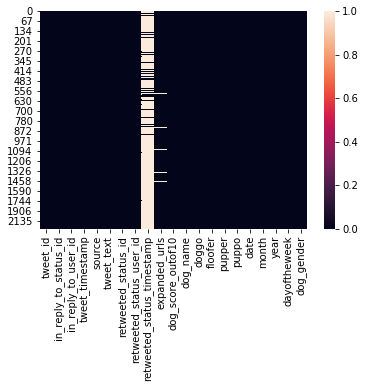

In [249]:
sns.heatmap(df1_clean.isnull())

It is evident from the above graph that the column retweeted_status_timestamp has more number of null values. so it has to be dropped from the dataset.

In [250]:
df1_clean = df1_clean.drop(columns=["retweeted_status_timestamp"],axis=1)


#### Test

In [251]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 2339
Data columns (total 20 columns):
tweet_id                    1436 non-null object
in_reply_to_status_id       1436 non-null object
in_reply_to_user_id         1436 non-null object
tweet_timestamp             1436 non-null datetime64[ns]
source                      1436 non-null object
tweet_text                  1436 non-null object
retweeted_status_id         1436 non-null object
retweeted_status_user_id    1436 non-null object
expanded_urls               1396 non-null object
dog_score_outof10           1436 non-null float64
dog_name                    1436 non-null object
doggo                       1436 non-null object
floofer                     1436 non-null object
pupper                      1436 non-null object
puppo                       1436 non-null object
date                        1436 non-null int64
month                       1436 non-null object
year                        1436 non-null int64
dayo

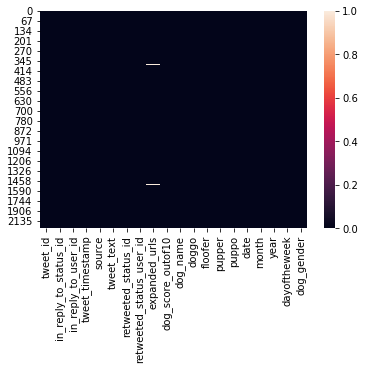

In [252]:
sns.heatmap(df1_clean.isnull())

#### Define  

Issue 8 : Melt the dog stage column into single column

#### Code

In [253]:
df1_clean = pd.melt(df1_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 
                        'in_reply_to_user_id',
                        'tweet_timestamp', 'source', 'tweet_text',
                        'retweeted_status_id',
                        'retweeted_status_user_id',
       'expanded_urls', 'dog_score_outof10', 'dog_name','date', 'month',
       'year', 'dayoftheweek', 'dog_gender'],
                               var_name='dogs', value_name='dogs_stage')

In [254]:
df1_clean = df1_clean.drop(columns="dogs",axis = 1)

In [255]:
df1_clean = df1_clean.sort_values('dogs_stage',ascending=False).drop_duplicates(subset='tweet_id',keep='first')

In [256]:
df1_clean.dogs_stage.value_counts()

None       1171
pupper      159
doggo        71
puppo        26
floofer       9
Name: dogs_stage, dtype: int64

#### Test

In [257]:
df1_clean.iloc[:,[0,15,16]].sort_values('dogs_stage',ascending=False).head(10)

,tweet_id,dog_gender,dogs_stage
4999,780931614150983680,NaN,puppo
4847,802239329049477120,NaN,puppo
4435,867421006826221569,Female,puppo
4756,816829038950027264,NaN,puppo
4378,878776093423087618,NaN,puppo
4322,889531135344209921,Male,puppo
4727,820013781606658049,Male,puppo
4826,805823200554876929,NaN,puppo
4401,874012996292530176,Male,puppo
4320,889665388333682689,NaN,puppo


#### Define

Issue 9: Append dog predicted name with corresponding C.I value

#### Code

In [258]:
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df2_clean.apply(get_prediction_confidence, axis=1)
df2_clean['prediction'] = prediction
df2_clean['confidence'] = confidence

#### Test

In [259]:
df2_clean.iloc[:5,[12,13]]

,prediction,confidence
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311


#### Define

Issue 10: Change the datatype

#### Code

In [260]:
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
#df3_final_clean.user_created_time = pd.to_datetime(df3_final_clean.user_created_time)
#df3_final_clean.tweet_created_time = pd.to_datetime(df3_final_clean.tweet_created_time)

In [261]:
df3_final_clean.tweet_id = df3_final_clean.tweet_id.astype(str)

#### Test

In [262]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
prediction    2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


In [263]:
df3_final_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null object
retweets           2331 non-null int64
favorites          2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


#### Define

Issue 11: Remove unwanted columns in all dataframes

#### Code

In [264]:
df1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                        'tweet_timestamp'],
                     axis=1,inplace = True)

In [265]:
df2_clean.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

#### Test

In [266]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 4999 to 4341
Data columns (total 14 columns):
tweet_id                    1436 non-null object
source                      1436 non-null object
tweet_text                  1436 non-null object
retweeted_status_id         1436 non-null object
retweeted_status_user_id    1436 non-null object
expanded_urls               1396 non-null object
dog_score_outof10           1436 non-null float64
dog_name                    1436 non-null object
date                        1436 non-null int64
month                       1436 non-null object
year                        1436 non-null int64
dayoftheweek                1436 non-null object
dog_gender                  1436 non-null object
dogs_stage                  1436 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 168.3+ KB


In [267]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
prediction    2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), object(3)
memory usage: 64.9+ KB


#### Define

Issue 12: Merge the dataframe

#### Code

In [268]:
tweet_final_clean = pd.merge(df1_clean,df2_clean,how="inner",on="tweet_id")

In [269]:
tweet_final_clean = pd.merge(tweet_final_clean,df3_final_clean,how="inner",on="tweet_id")

#### Test

In [270]:
tweet_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 21 columns):
tweet_id                    1202 non-null object
source                      1202 non-null object
tweet_text                  1202 non-null object
retweeted_status_id         1202 non-null object
retweeted_status_user_id    1202 non-null object
expanded_urls               1202 non-null object
dog_score_outof10           1202 non-null float64
dog_name                    1202 non-null object
date                        1202 non-null int64
month                       1202 non-null object
year                        1202 non-null int64
dayoftheweek                1202 non-null object
dog_gender                  1202 non-null object
dogs_stage                  1202 non-null object
jpg_url                     1202 non-null object
prediction                  1202 non-null object
confidence                  1202 non-null float64
retweets                    1202 non-null int64
favorites   

#### Define

In [ ]:
Issue 13: Remove the retweets records

### Code

In [278]:
df1.drop(df1[df1["retweeted_status_id"].notnull()].index,inplace=True)

### Test

In [279]:
df1.retweeted_status_id.notnull().sum()

0

#### Define

Issue 14: Reorder the structure of the final dataframe

#### Code

In [280]:
new_structure = ['tweet_id','tweet_text','source','expanded_urls',
                 'date','month','year','dayoftheweek',
                 'favorites','retweets','retweeted_status_id', 
                 'retweeted_status_user_id',
                 'user_followers','user_favourites',
                 'dog_name',
                 'dog_gender',
                 'dog_score_outof10','dogs_stage','jpg_url','prediction',
                 'confidence']

In [281]:
tweet_final_clean = tweet_final_clean.reindex(columns=new_structure)

#### Test

In [282]:
tweet_final_clean.head(5)

,tweet_id,tweet_text,source,expanded_urls,date,month,year,dayoftheweek,favorites,retweets,...,retweeted_status_user_id,user_followers,user_favourites,dog_name,dog_gender,dog_score_outof10,dogs_stage,jpg_url,prediction,confidence
0,780931614150983680,I want to finally rate this iconic puppo who t...,Twitter for iPhone,https://twitter.com/dog_rates/status/780931614...,28,Sep,2016,Wednesday,21664,7301,...,nan,8855171,145874,None,NaN,13.0,puppo,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,NaN,0.000000
1,867421006826221569,This is Shikha. She just watched you drop a sk...,Twitter for iPhone,https://twitter.com/dog_rates/status/867421006...,24,May,2017,Wednesday,15127,2285,...,nan,8855164,145874,Shikha,Female,12.0,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.616457
2,787717603741622272,This is Tonks. She is a service puppo. Can hea...,Twitter for iPhone,https://twitter.com/dog_rates/status/787717603...,16,Oct,2016,Sunday,10319,2784,...,nan,8855171,145874,Tonks,Female,13.0,puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,German_shepherd,0.992339
3,790946055508652032,This is Betty. She's assisting with the dishes...,Twitter for iPhone,https://twitter.com/dog_rates/status/790946055...,25,Oct,2016,Tuesday,16758,4719,...,nan,8855171,145874,Betty,NaN,12.0,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,golden_retriever,0.245773
4,793195938047070209,Say hello to Lily. She's pupset that her costu...,Twitter for iPhone,https://twitter.com/dog_rates/status/793195938...,31,Oct,2016,Monday,15365,5656,...,nan,8855171,145874,Lily,Female,12.0,puppo,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,Labrador_retriever,0.654762


In [283]:
tweet_final_clean.columns

Index(['tweet_id', 'tweet_text', 'source', 'expanded_urls', 'date', 'month',
       'year', 'dayoftheweek', 'favorites', 'retweets', 'retweeted_status_id',
       'retweeted_status_user_id', 'user_followers', 'user_favourites',
       'dog_name', 'dog_gender', 'dog_score_outof10', 'dogs_stage', 'jpg_url',
       'prediction', 'confidence'],
      dtype='object')

### Storing the final dataset as CSV file

In [294]:
final_dataset = pd.DataFrame(tweet_final_clean, columns = ['tweet_id', 'tweet_text', 'source', 'expanded_urls', 'date', 'month',
       'year', 'dayoftheweek', 'favorites', 'retweets','retweeted_status_id',
        'retweeted_status_user_id',                                                   
       'user_followers', 'user_favourites', 'dog_name', 'dog_gender',
       'dog_score_outof10', 'dogs_stage', 'jpg_url', 'prediction',
       'confidence'])


In [301]:
final_dataset.to_csv('twitter_archive_master', encoding = 'utf-8', index=False)

In [302]:
twitter_archive_master = pd.read_csv("twitter_archive_master")

In [303]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 21 columns):
tweet_id                    1202 non-null int64
tweet_text                  1202 non-null object
source                      1202 non-null object
expanded_urls               1202 non-null object
date                        1202 non-null int64
month                       1202 non-null object
year                        1202 non-null int64
dayoftheweek                1202 non-null object
favorites                   1202 non-null int64
retweets                    1202 non-null int64
retweeted_status_id         62 non-null float64
retweeted_status_user_id    62 non-null float64
user_followers              1202 non-null int64
user_favourites             1202 non-null int64
dog_name                    1202 non-null object
dog_gender                  548 non-null object
dog_score_outof10           1202 non-null float64
dogs_stage                  1202 non-null object
jpg_url             

In [3]:
df = pd.read_csv("twitter_archive_master")

In [4]:
df.head(5)

,tweet_id,tweet_text,source,expanded_urls,date,month,year,dayoftheweek,favorites,retweets,...,retweeted_status_user_id,user_followers,user_favourites,dog_name,dog_gender,dog_score_outof10,dogs_stage,jpg_url,prediction,confidence
0,780931614150983680,I want to finally rate this iconic puppo who t...,Twitter for iPhone,https://twitter.com/dog_rates/status/780931614...,28,Sep,2016,Wednesday,21664,7301,...,NaN,8855171,145874,None,NaN,13.0,puppo,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,NaN,0.000000
1,867421006826221569,This is Shikha. She just watched you drop a sk...,Twitter for iPhone,https://twitter.com/dog_rates/status/867421006...,24,May,2017,Wednesday,15127,2285,...,NaN,8855164,145874,Shikha,Female,12.0,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.616457
2,787717603741622272,This is Tonks. She is a service puppo. Can hea...,Twitter for iPhone,https://twitter.com/dog_rates/status/787717603...,16,Oct,2016,Sunday,10319,2784,...,NaN,8855171,145874,Tonks,Female,13.0,puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,German_shepherd,0.992339
3,790946055508652032,This is Betty. She's assisting with the dishes...,Twitter for iPhone,https://twitter.com/dog_rates/status/790946055...,25,Oct,2016,Tuesday,16758,4719,...,NaN,8855171,145874,Betty,NaN,12.0,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,golden_retriever,0.245773
4,793195938047070209,Say hello to Lily. She's pupset that her costu...,Twitter for iPhone,https://twitter.com/dog_rates/status/793195938...,31,Oct,2016,Monday,15365,5656,...,NaN,8855171,145874,Lily,Female,12.0,puppo,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,Labrador_retriever,0.654762


In [315]:
df.tail(5)

,tweet_id,tweet_text,source,expanded_urls,date,month,year,dayoftheweek,favorites,retweets,...,retweeted_status_user_id,user_followers,user_favourites,dog_name,dog_gender,dog_score_outof10,dogs_stage,jpg_url,prediction,confidence
1197,884925521741709313,This is Earl. He found a hat. Nervous about wh...,Twitter for iPhone,https://twitter.com/dog_rates/status/884925521...,12,Jul,2017,Wednesday,71311,16155,...,NaN,8855163,145874,Earl,Male,12.0,None,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Italian_greyhound,0.259916
1198,885167619883638784,Here we have a corgi undercover as a malamute....,Twitter for iPhone,https://twitter.com/dog_rates/status/885167619...,12,Jul,2017,Wednesday,20268,3910,...,NaN,8855163,145874,None,NaN,13.0,None,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,malamute,0.812482
1199,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,Twitter for iPhone,https://twitter.com/dog_rates/status/830583320...,13,Jul,2017,Thrusday,0,16569,...,4.196984e+09,8855163,145874,Lilly,Female,13.0,None,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,Labrador_retriever,0.908703
1200,885528943205470208,This is Maisey. She fell asleep mid-excavation...,Twitter for iPhone,https://twitter.com/dog_rates/status/885528943...,13,Jul,2017,Thrusday,33302,5727,...,NaN,8855163,145874,Maisey,Female,13.0,None,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,pug,0.369275
1201,885984800019947520,Viewer discretion advised. This is Jimbo. He w...,Twitter for iPhone,https://twitter.com/dog_rates/status/885984800...,14,Jul,2017,Friday,30183,6022,...,NaN,8855163,145874,Jimbo,Male,12.0,None,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,Blenheim_spaniel,0.972494


In [316]:
df.columns

Index(['tweet_id', 'tweet_text', 'source', 'expanded_urls', 'date', 'month',
       'year', 'dayoftheweek', 'favorites', 'retweets', 'retweeted_status_id',
       'retweeted_status_user_id', 'user_followers', 'user_favourites',
       'dog_name', 'dog_gender', 'dog_score_outof10', 'dogs_stage', 'jpg_url',
       'prediction', 'confidence'],
      dtype='object')

In [317]:
df.shape

(1202, 21)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 21 columns):
tweet_id                    1202 non-null int64
tweet_text                  1202 non-null object
source                      1202 non-null object
expanded_urls               1202 non-null object
date                        1202 non-null int64
month                       1202 non-null object
year                        1202 non-null int64
dayoftheweek                1202 non-null object
favorites                   1202 non-null int64
retweets                    1202 non-null int64
retweeted_status_id         62 non-null float64
retweeted_status_user_id    62 non-null float64
user_followers              1202 non-null int64
user_favourites             1202 non-null int64
dog_name                    1202 non-null object
dog_gender                  548 non-null object
dog_score_outof10           1202 non-null float64
dogs_stage                  1202 non-null object
jpg_url             

In [319]:
df.describe()

,tweet_id,date,year,favorites,retweets,retweeted_status_id,retweeted_status_user_id,user_followers,user_favourites,dog_score_outof10,confidence
count,1.202000e+03,1202.000000,1202.000000,1202.000000,1202.000000,6.200000e+01,6.200000e+01,1.202000e+03,1202.000000,1202.000000,1202.000000
mean,7.675589e+17,15.693012,2016.138935,11246.779534,3536.187188,7.665545e+17,1.270100e+16,8.855150e+06,145874.010815,13.756681,0.514555
std,6.921065e+16,8.923102,0.674131,14065.816170,5308.437778,5.619705e+16,1.000077e+17,8.891517e+01,0.103476,52.222071,0.329727
min,6.661022e+17,1.000000,2015.000000,0.000000,11.000000,6.675094e+17,7.832140e+05,8.854946e+06,145874.000000,11.000000,0.000000
25%,6.990456e+17,8.000000,2016.000000,2691.000000,962.750000,7.273831e+17,4.196984e+09,8.855164e+06,145874.000000,11.000000,0.245229
50%,7.721554e+17,16.000000,2016.000000,7213.000000,2105.500000,7.801500e+17,4.196984e+09,8.855171e+06,145874.000000,12.000000,0.522865
75%,8.249690e+17,23.000000,2017.000000,15275.500000,4068.000000,7.991435e+17,4.196984e+09,8.855186e+06,145874.000000,13.000000,0.817731
max,8.924206e+17,31.000000,2017.000000,153976.000000,76279.000000,8.768508e+17,7.874618e+17,8.855598e+06,145875.000000,1776.000000,0.999953


### Which dog gender is gets involved most in the user rating process ?


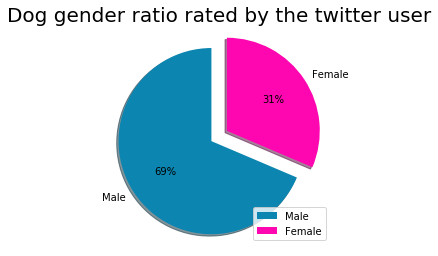

In [320]:
# Dog ratio based on gender
labels = 'Male', 'Female'
Totalcount = df.dog_gender.count()
Maleprop = ((df[df['dog_gender']=='Male'].count()['dog_gender'])/Totalcount)*100
Femaleprop = ((df[df['dog_gender']=='Female'].count()['dog_gender'])/Totalcount)*100
sizes = [Maleprop,Femaleprop]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
col = ["#0C86B1","#ff07b0"]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90,colors=col)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
leg = ax1.legend(loc=4)
plt.title("Dog gender ratio rated by the twitter user",fontsize=20)
plt.show()

It is conclusive from the graph that more dogs in male gender is reviewed by the twitter users than the dogs in female gender.i,e) approximately less than 50% of female dogs get reviewed by the users in the WeRateDogs twitter page.

### Analysis on dog stages grouped by gender ?

In [321]:
df.groupby(['dog_gender'])['dogs_stage'].value_counts()

dog_gender  dogs_stage
Female      None          140
            pupper         17
            doggo           8
            puppo           7
Male        None          320
            doggo          25
            pupper         24
            puppo           4
            floofer         3
Name: dogs_stage, dtype: int64

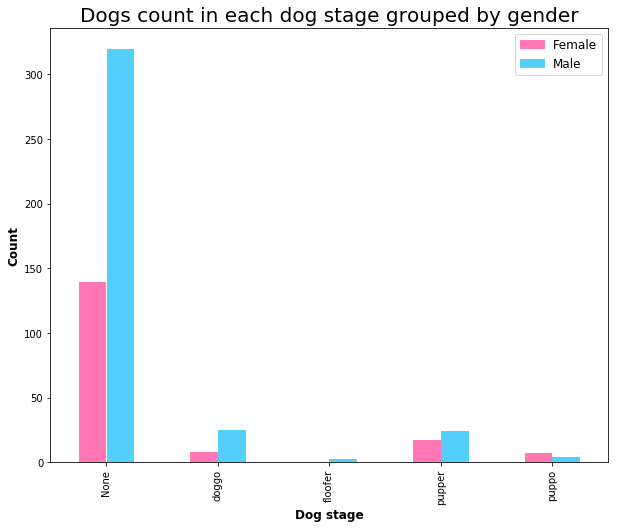

In [5]:
import matplotlib.patches as mpatches
col=['#ff77b4','#54CFFB']
df.groupby(['dog_gender'])['dogs_stage'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col,edgecolor="white");
plt.title('Dogs count in each dog stage grouped by gender',fontsize=20);
plt.xlabel('Dog stage',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
pink_patch = mpatches.Patch(color='#ff77b4', label='Female');
blue_patch = mpatches.Patch(color='#54CFFB', label='Male');
plt.legend(handles=[pink_patch,blue_patch],fontsize=12);

It is conclusive that floofer is the dog stage with no dogs in female gender and it is the least popular in twitter since it got very least reviews by the users. On the other hand, most of the reviews given by the twitter users doesnt point any of the dog stages and they rated the dogs based on other factors in general.

In [323]:
df.groupby(['dog_gender'])['dog_score_outof10'].sum()

dog_gender
Female    2072.0
Male      4493.0
Name: dog_score_outof10, dtype: float64

### Which gender dogs has more ratings in general ?

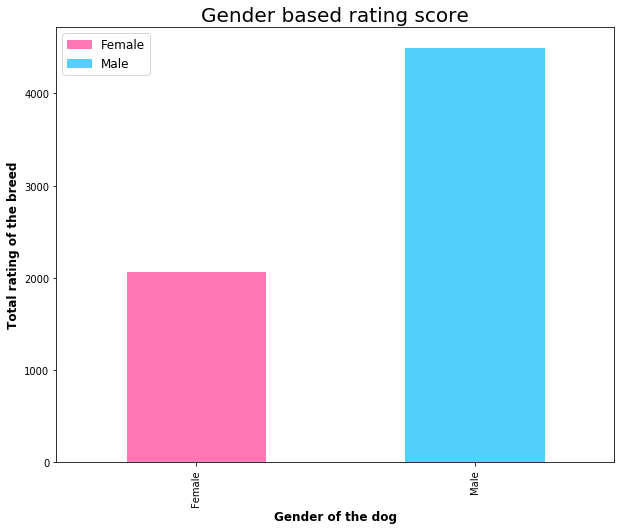

In [324]:
import matplotlib.patches as mpatches
col=['#ff77b4','#54CFFB']
df.groupby(['dog_gender'])['dog_score_outof10'].sum().plot.bar(figsize=(10,8),color=col,edgecolor="white");
plt.title('Gender based rating score',fontsize=20);
plt.xlabel('Gender of the dog',fontsize = 12,fontweight="bold");
plt.ylabel('Total rating of the breed',fontsize = 12,fontweight="bold");
pink_patch = mpatches.Patch(color='#ff77b4', label='Female');
blue_patch = mpatches.Patch(color='#54CFFB', label='Male');
plt.legend(handles=[pink_patch,blue_patch],fontsize=12);

From the above bar chart it is evident that male dogs are high in total ratings than the female dogs.

### Analysis on Retweet Vs Dog Score


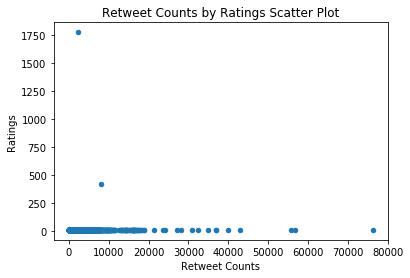

In [325]:
df.plot(x='retweets', y='dog_score_outof10', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

In the above scatter plot, we can conclude that the tweets which gave more score to the dogs are less retweeted in general. On the other hand the tweets with less rating score for the dogs are higly retweeted by the users.

### Correlation heat map


Text(0.5,1,'Correlation Heat Map')

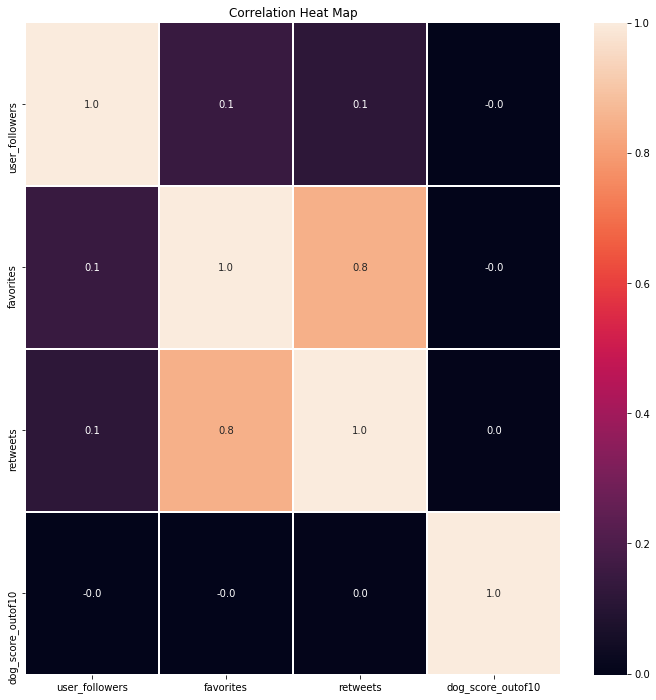

In [326]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df[['source','user_followers','favorites','retweets',
               'dog_score_outof10']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

1) There is a strong relationship between favorites and retweets
2) There is a week relationship between user_followers and retweets.